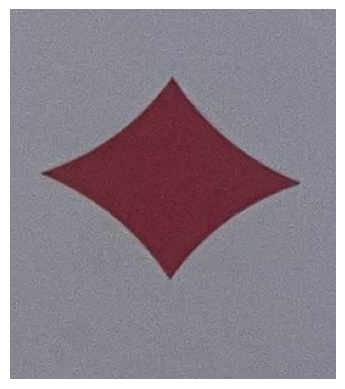

In [2]:
# Import the necessary library
import matplotlib.pyplot as plt
import cv2

# Load the image
image_path = 'diamond.jpg'
image = cv2.imread(image_path)

image_copy = image.copy()

# Convert BGR to RGB for displaying
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image on a graph
plt.imshow(image_rgb)
plt.axis('off')  # Hide the axis
plt.show()

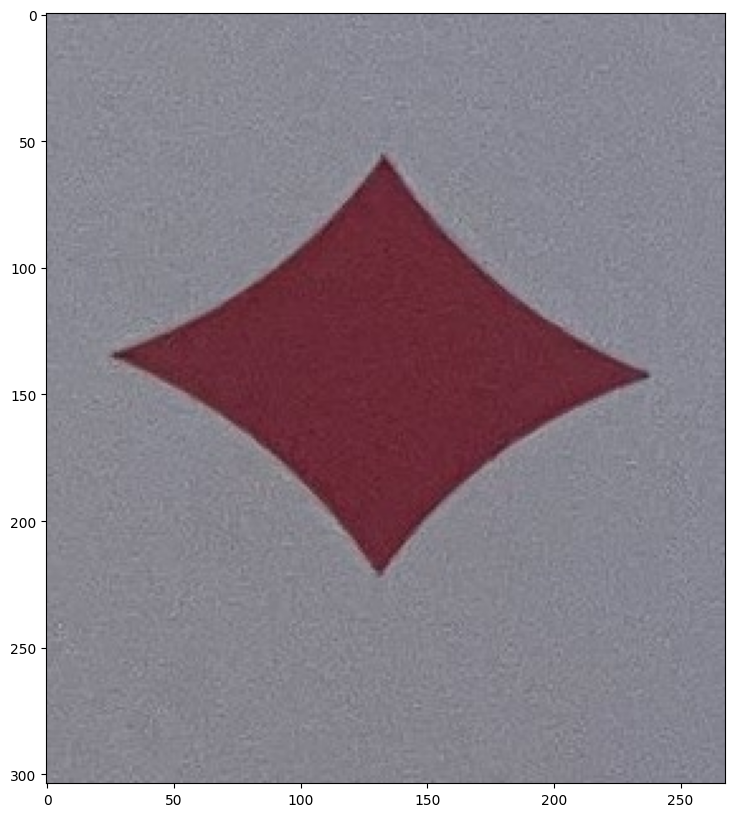

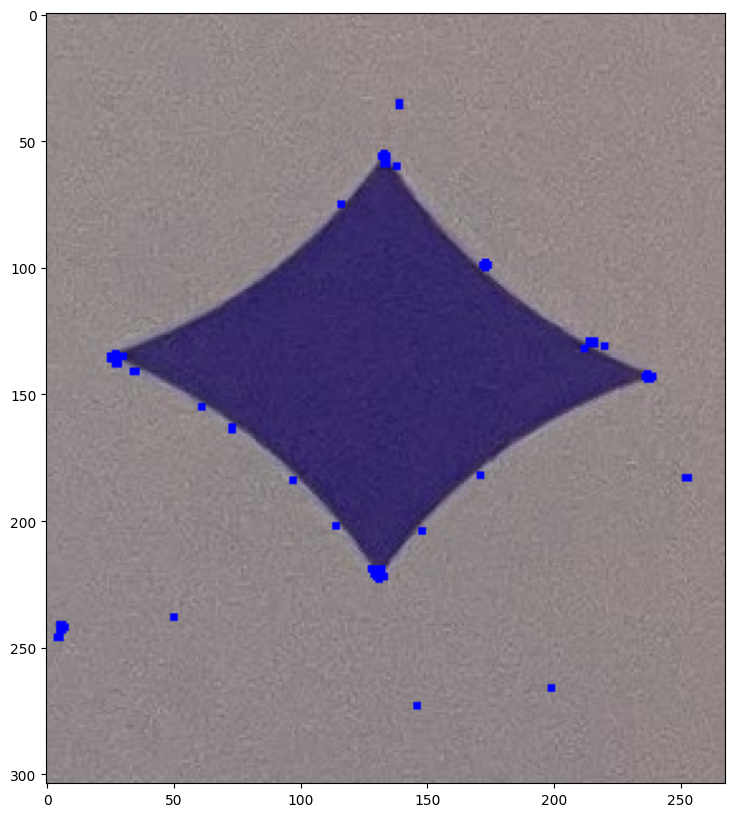

In [5]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

image_path = 'diamond.jpg'
image = cv2.imread(image_path)

#Make a copy 
image_copy = image.copy()

#Convert BGR to RGB for displaying
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#Convert to grayscale
gray = cv2.cvtColor(image_copy, cv2.COLOR_BGR2GRAY)

#Detect corners using the Harris corner detection
gray = np.float32(gray)
dst = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.04)

#Result is dilated for marking the corners
dst = cv2.dilate(dst, None)

#Threshold for an optimal value
image_copy[dst > 0.01 * dst.max()] = [0, 0, 255]

plt.figure(figsize=(10, 10))
plt.imshow(image_rgb)

plt.figure(figsize=(10, 10))
plt.imshow(image_copy)
plt.show()

C:\Users\03KLK\AppData\Local\Temp\ipykernel_19672\1611157634.py:19: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)


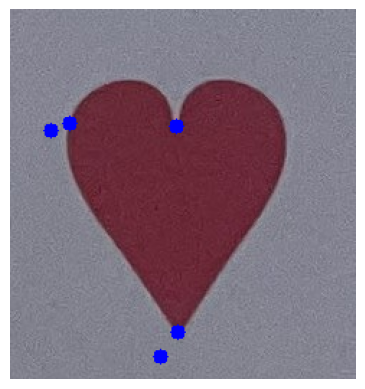

In [56]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image from the uploaded path
image_path = '.jpg'
image = cv2.imread(image_path)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply GaussianBlur to smoothen image
blurred_gray = cv2.GaussianBlur(gray, (5, 5), 0)

# Detect the four strongest corners
corners = cv2.goodFeaturesToTrack(blurred_gray, maxCorners=5, qualityLevel=0.01, minDistance=10)

# Convert the corners to integer values
corners = np.int0(corners)

# Create a copy of the image to draw the corners on
image_with_corners = image.copy()

# Draw the corners on the image
for corner in corners:
    x, y = corner.ravel()
    cv2.circle(image_with_corners, (x, y), 5, (255, 0, 0), -1)

# Convert the image with corners to RGB
image_with_corners_rgb = cv2.cvtColor(image_with_corners, cv2.COLOR_BGR2RGB)

# Display the image with the four corners marked
plt.imshow(image_with_corners_rgb)
plt.axis('off')  # Hide the axis
plt.show()

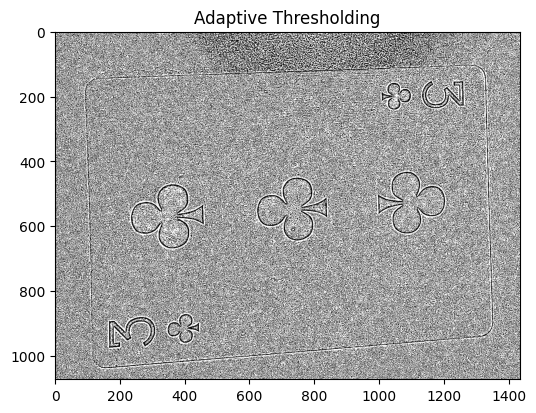

In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image
image_path = 'shamrock3.jpg'
image = cv2.imread(image_path)

#convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#adaptive thresholding
thresh_adaptive = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                        cv2.THRESH_BINARY, 11, 2)



# Display the thresholded image using matplotlib to visualize the result
plt.figure(figsize=(6, 6))
plt.title('Adaptive Thresholding')
plt.imshow(thresh_adaptive, cmap='gray')
plt.show()

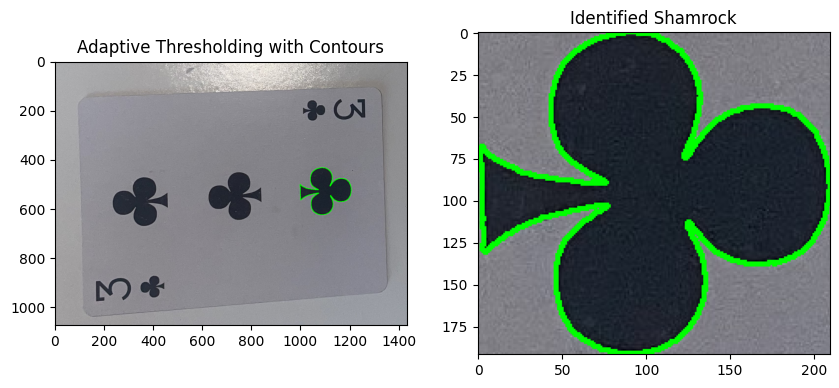

In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Function to sort contours by area
def sort_contours(cnts):
    # Sort contours based on contour area and then return the sorted contours
    return sorted(cnts, key=cv2.contourArea, reverse=True)

# Load the image and convert to grayscale
image_path = 'shamrock3.jpg'
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply adaptive thresholding to binarize the image
thresh_adaptive = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

# Find contours from the thresholded image
contours, hierarchy = cv2.findContours(thresh_adaptive, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Sort the contours by area
sorted_contours = sort_contours(contours)

# The largest contour is usually the outer border of the card, so we start from the second one
for contour in sorted_contours[1:]:
    # Approximate the contour to reduce the number of points
    peri = cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, 0.02 * peri, True)
    
    # A shamrock should have a complex shape; if the contour has more than 4 vertices, it could be a shamrock
    if len(approx) > 4:
        # Assuming the shamrock contours will not be the largest, we can pick the first suitable one
        x, y, w, h = cv2.boundingRect(contour)
        
        # Crop the image to this bounding rectangle
        shamrock = image[y:y+h, x:x+w]
        
        # Draw the contour on the image - purely for visualization
        cv2.drawContours(image, [contour], -1, (0, 255, 0), 2)
        
        # Exit the loop after finding the first shamrock
        break

# Show the result
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.title('Adaptive Thresholding with Contours')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.title('Identified Shamrock')
plt.imshow(cv2.cvtColor(shamrock, cv2.COLOR_BGR2RGB))
plt.show()


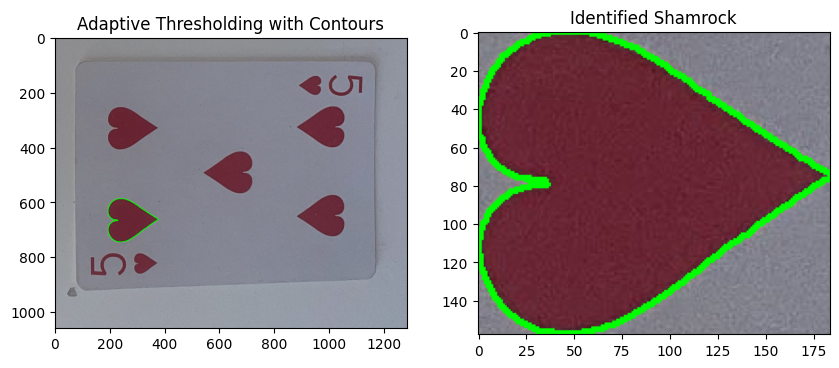

In [9]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Function to sort contours by area
def sort_contours(cnts):
    # Sort contours based on contour area and then return the sorted contours
    return sorted(cnts, key=cv2.contourArea, reverse=True)

image_path = 'hearts5.jpg'
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply adaptive thresholding to binarize the image
thresh_adaptive = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

# Find contours from the thresholded image
contours, hierarchy = cv2.findContours(thresh_adaptive, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Sort the contours by area
sorted_contours = sort_contours(contours)

# The largest contour is usually the outer border of the card, so we start from the second one
for contour in sorted_contours[1:]:
    # Approximate the contour to reduce the number of points
    peri = cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, 0.02 * peri, True)
    
    # A shamrock should have a complex shape; if the contour has more than 4 vertices, it could be a shamrock
    if len(approx) > 4:
        # Assuming the shamrock contours will not be the largest, we can pick the first suitable one
        x, y, w, h = cv2.boundingRect(contour)
        
        # Crop the image to this bounding rectangle
        shamrock = image[y:y+h, x:x+w]
        
        # Draw the contour on the image - purely for visualization
        cv2.drawContours(image, [contour], -1, (0, 255, 0), 2)
        
        # Exit the loop after finding the first shamrock
        break

# Show the result
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.title('Adaptive Thresholding with Contours')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.title('Identified Shamrock')
plt.imshow(cv2.cvtColor(shamrock, cv2.COLOR_BGR2RGB))
plt.show()


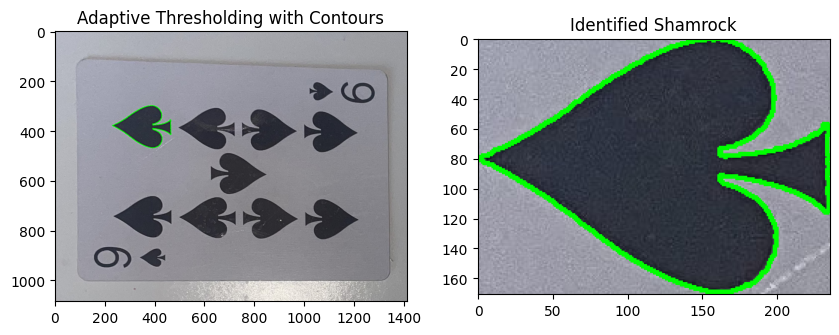

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Function to sort contours by area
def sort_contours(cnts):
    # Sort contours based on contour area and then return the sorted contours
    return sorted(cnts, key=cv2.contourArea, reverse=True)

image_path = 'clubs9.jpg'
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply adaptive thresholding to binarize the image
thresh_adaptive = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

# Find contours from the thresholded image
contours, hierarchy = cv2.findContours(thresh_adaptive, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Sort the contours by area
sorted_contours = sort_contours(contours)

# The largest contour is usually the outer border of the card, so we start from the second one
for contour in sorted_contours[1:]:
    # Approximate the contour to reduce the number of points
    peri = cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, 0.02 * peri, True)
    
    # A shamrock should have a complex shape; if the contour has more than 4 vertices, it could be a shamrock
    if len(approx) > 4:
        # Assuming the shamrock contours will not be the largest, we can pick the first suitable one
        x, y, w, h = cv2.boundingRect(contour)
        
        # Crop the image to this bounding rectangle
        shamrock = image[y:y+h, x:x+w]
        
        # Draw the contour on the image - purely for visualization
        cv2.drawContours(image, [contour], -1, (0, 255, 0), 2)
        
        # Exit the loop after finding the first shamrock
        break

# Show the result
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.title('Adaptive Thresholding with Contours')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.title('Identified Shamrock')
plt.imshow(cv2.cvtColor(shamrock, cv2.COLOR_BGR2RGB))
plt.show()


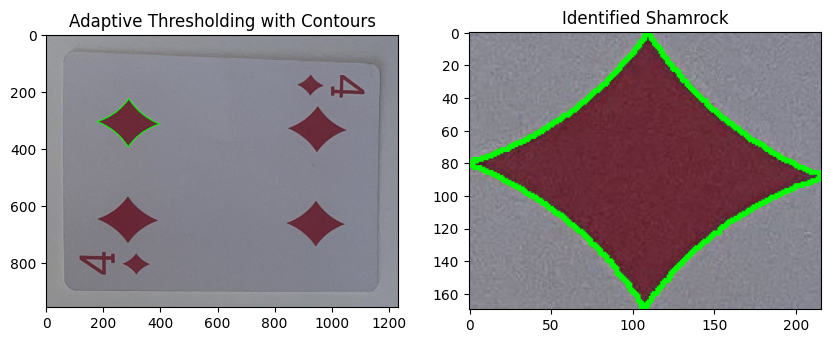

In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Function to sort contours by area
def sort_contours(cnts):
    # Sort contours based on contour area and then return the sorted contours
    return sorted(cnts, key=cv2.contourArea, reverse=True)

image_path = 'diamonds4.jpg'
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply adaptive thresholding to binarize the image
thresh_adaptive = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

# Find contours from the thresholded image
contours, hierarchy = cv2.findContours(thresh_adaptive, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Sort the contours by area
sorted_contours = sort_contours(contours)

# The largest contour is usually the outer border of the card, so we start from the second one
for contour in sorted_contours[1:]:
    # Approximate the contour to reduce the number of points
    peri = cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, 0.02 * peri, True)
    
    # A shamrock should have a complex shape; if the contour has more than 4 vertices, it could be a shamrock
    if len(approx) > 4:
        # Assuming the shamrock contours will not be the largest, we can pick the first suitable one
        x, y, w, h = cv2.boundingRect(contour)
        
        # Crop the image to this bounding rectangle
        shamrock = image[y:y+h, x:x+w]
        
        # Draw the contour on the image - purely for visualization
        cv2.drawContours(image, [contour], -1, (0, 255, 0), 2)
        
        # Exit the loop after finding the first shamrock
        break

# Show the result
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.title('Adaptive Thresholding with Contours')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.title('Identified Shamrock')
plt.imshow(cv2.cvtColor(shamrock, cv2.COLOR_BGR2RGB))
plt.show()


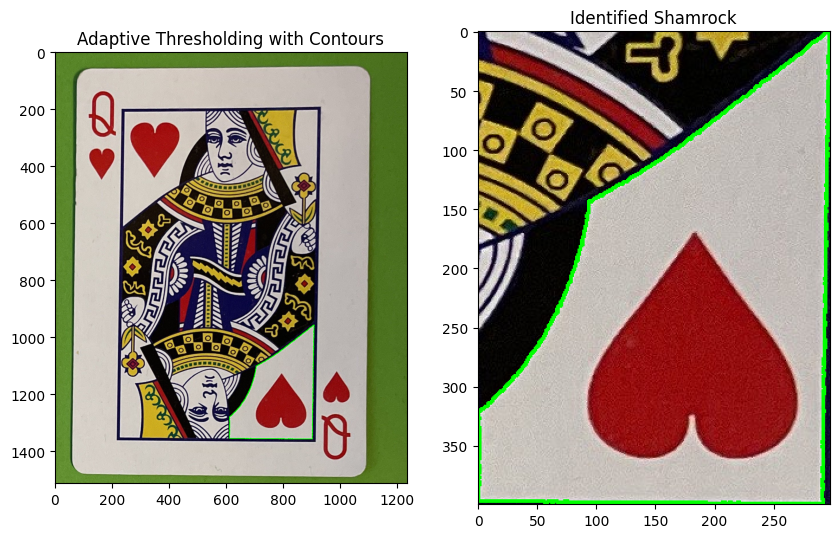

In [16]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Function to sort contours by area
def sort_contours(cnts):
    # Sort contours based on contour area and then return the sorted contours
    return sorted(cnts, key=cv2.contourArea, reverse=True)

image_path = 'heartQ.jpg'
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply adaptive thresholding to binarize the image
thresh_adaptive = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

# Find contours from the thresholded image
contours, hierarchy = cv2.findContours(thresh_adaptive, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Sort the contours by area
sorted_contours = sort_contours(contours)

# The largest contour is usually the outer border of the card, so we start from the second one
for contour in sorted_contours[2:]:
    # Approximate the contour to reduce the number of points
    peri = cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, 0.02 * peri, True)
    
    # A shamrock should have a complex shape; if the contour has more than 4 vertices, it could be a shamrock
    if len(approx) > 4:
        # Assuming the shamrock contours will not be the largest, we can pick the first suitable one
        x, y, w, h = cv2.boundingRect(contour)
        
        # Crop the image to this bounding rectangle
        shamrock = image[y:y+h, x:x+w]
        
        # Draw the contour on the image - purely for visualization
        cv2.drawContours(image, [contour], -1, (0, 255, 0), 2)
        
        # Exit the loop after finding the first shamrock
        break

# Show the result
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.title('Adaptive Thresholding with Contours')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.title('Identified Shamrock')
plt.imshow(cv2.cvtColor(shamrock, cv2.COLOR_BGR2RGB))
plt.show()

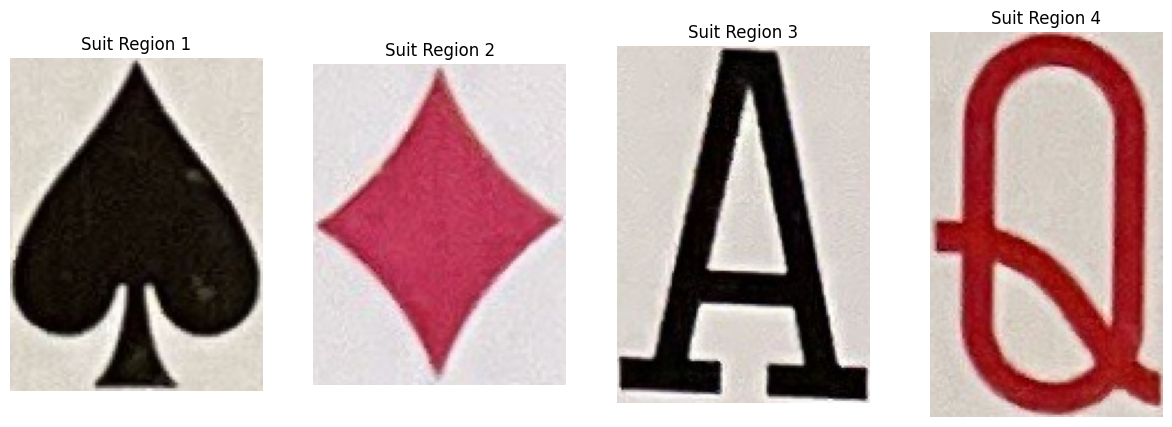

In [90]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def sort_contours(cnts):
    # Sort contours based on contour area and then return the sorted contours
    return sorted(cnts, key=cv2.contourArea, reverse=True)

# Function to order points for perspective transform
def order_points(pts):
    rect = np.zeros((4, 2), dtype="float32")
    s = pts.sum(axis=1)
    rect[0] = pts[np.argmin(s)]
    rect[2] = pts[np.argmax(s)]
    diff = np.diff(pts, axis=1)
    rect[1] = pts[np.argmin(diff)]
    rect[3] = pts[np.argmax(diff)]
    return rect

# Function to perform perspective transform
def four_point_transform(image, pts):
    rect = order_points(pts)
    (tl, tr, br, bl) = rect
    widthA = np.sqrt(((br[0] - bl[0]) ** 2) + ((br[1] - bl[1]) ** 2))
    widthB = np.sqrt(((tr[0] - tl[0]) ** 2) + ((tr[1] - tl[1]) ** 2))
    maxWidth = max(int(widthA), int(widthB))
    heightA = np.sqrt(((tr[0] - br[0]) ** 2) + ((tr[1] - br[1]) ** 2))
    heightB = np.sqrt(((tl[0] - bl[0]) ** 2) + ((tl[1] - bl[1]) ** 2))
    maxHeight = max(int(heightA), int(heightB))
    dst = np.array([
        [0, 0],
        [maxWidth - 1, 0],
        [maxWidth - 1, maxHeight - 1],
        [0, maxHeight - 1]], dtype="float32")
    M = cv2.getPerspectiveTransform(rect, dst)
    warped = cv2.warpPerspective(image, M, (maxWidth, maxHeight))
    return warped

def crop_number_regions(img):
    # Convert to grayscale and threshold
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (3, 3), 0)
    thresh = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)

    # Find contours
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Filter out small contours
    contours = [cnt for cnt in contours if cv2.contourArea(cnt) > 1000]

    # Straighten each card and crop the number region
    number_regions = []
    for cnt in contours:
        peri = cv2.arcLength(cnt, True)
        approx = cv2.approxPolyDP(cnt, 0.02 * peri, True)
        if len(approx) == 4:
            # Straighten the card
            warped_card = four_point_transform(img, approx.reshape(4, 2))

            # Crop the number region from the straightened card (top left corner)
            h, w = warped_card.shape[:2]
            number_region = warped_card[0:int(h * 0.35), 0:int(w * 0.17)]
            number_regions.append(number_region)

    return number_regions

def find_suit(number_regions):
    contour_pairs = []  

    for number_region in number_regions:
        #convert to grayscale and apply thresholding
        gray_region = cv2.cvtColor(number_region, cv2.COLOR_BGR2GRAY)
        thresh_region = cv2.adaptiveThreshold(gray_region, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY, 11, 2)
        
        #find contours in the thresholded number region
        contours_region, _= cv2.findContours(thresh_region, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        sorted_contours_region = sort_contours(contours_region)

        #assume the suit symbol is a smaller contour in the region
        for contour in sorted_contours_region[1:]:
            peri = cv2.arcLength(contour, True)
            approx = cv2.approxPolyDP(contour, 0.02 * peri, True)
            
            if len(approx) > 4:
                x, y, w, h = cv2.boundingRect(contour)
                #Crop the image to this bounding rectangle
                suit_region = number_region[y:y+h, x:x+w]
                contour_pairs.append(suit_region)
                break

    return contour_pairs

# Load the image from file
img = cv2.imread("cards_green.jpg")

# Use the function to get the number regions
number_regions = crop_number_regions(img)

contour_pairs = find_suit(number_regions)


# Show the cropped number regions from straightened cards
if contour_pairs:
    fig, axs = plt.subplots(1, len(contour_pairs), figsize=(15, 5))
    for i, suit_region in enumerate(contour_pairs):
        if suit_region is not None:
            axs[i].imshow(cv2.cvtColor(suit_region, cv2.COLOR_BGR2RGB))
            axs[i].set_title(f'Suit Region {i+1}')
        axs[i].axis('off')
    plt.show()
else:
    print("No suit regions to display.")

In [ ]:
def find_suit(number_regions):
    contour_pairs = []  

    for number_region in number_regions:
        #convert to grayscale and apply thresholding
        gray_region = cv2.cvtColor(number_region, cv2.COLOR_BGR2GRAY)
        thresh_region = cv2.adaptiveThreshold(gray_region, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY, 11, 2)
        
        #find contours in the thresholded number region
        contours_region, _= cv2.findContours(thresh_region, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        sorted_contours_region = sort_contours(contours_region)

        #assume the suit symbol is a smaller contour in the region
        for contour in sorted_contours_region:
            peri = cv2.arcLength(contour, True)
            approx = cv2.approxPolyDP(contour, 0.02 * peri, True)
            
            if len(approx) > 4:
                x, y, w, h = cv2.boundingRect(contour)
                #Crop the image to this bounding rectangle
                suit_region = number_region[y:y+h, x:x+w]
                contour_pairs.append(suit_region)
                break

    return contour_pairs

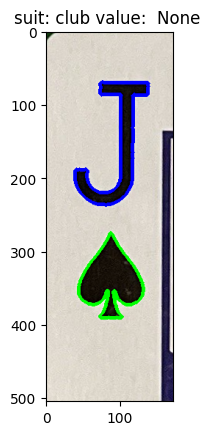

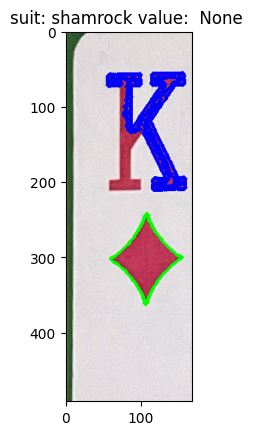

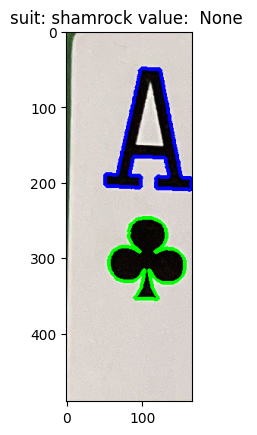

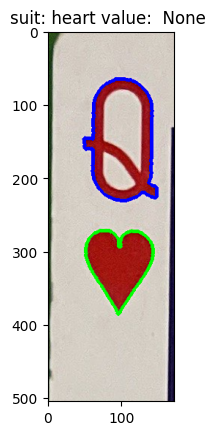

Card 1:  Suit - club, Number - None
Card 2:  Suit - shamrock, Number - None
Card 3:  Suit - shamrock, Number - None
Card 4:  Suit - heart, Number - None


ValueError: invalid literal for int() with base 10: 'club'

In [95]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def sort_contours(cnts):
    # Sort contours based on contour area and then return the sorted contours
    return sorted(cnts, key=cv2.contourArea, reverse=True)

# Function to order points for perspective transform
def order_points(pts):
    rect = np.zeros((4, 2), dtype="float32")
    s = pts.sum(axis=1)
    rect[0] = pts[np.argmin(s)]
    rect[2] = pts[np.argmax(s)]
    diff = np.diff(pts, axis=1)
    rect[1] = pts[np.argmin(diff)]
    rect[3] = pts[np.argmax(diff)]
    return rect

# Function to perform perspective transform
def four_point_transform(image, pts):
    rect = order_points(pts)
    (tl, tr, br, bl) = rect
    widthA = np.sqrt(((br[0] - bl[0]) ** 2) + ((br[1] - bl[1]) ** 2))
    widthB = np.sqrt(((tr[0] - tl[0]) ** 2) + ((tr[1] - tl[1]) ** 2))
    maxWidth = max(int(widthA), int(widthB))
    heightA = np.sqrt(((tr[0] - br[0]) ** 2) + ((tr[1] - br[1]) ** 2))
    heightB = np.sqrt(((tl[0] - bl[0]) ** 2) + ((tl[1] - bl[1]) ** 2))
    maxHeight = max(int(heightA), int(heightB))
    dst = np.array([
        [0, 0],
        [maxWidth - 1, 0],
        [maxWidth - 1, maxHeight - 1],
        [0, maxHeight - 1]], dtype="float32")
    M = cv2.getPerspectiveTransform(rect, dst)
    warped = cv2.warpPerspective(image, M, (maxWidth, maxHeight))
    return warped

def crop_number_regions(img):
    # Convert to grayscale and threshold
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (3, 3), 0)
    thresh = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)

    # Find contours
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Filter out small contours
    contours = [cnt for cnt in contours if cv2.contourArea(cnt) > 1000]

    # Straighten each card and crop the number region
    number_regions = []
    for cnt in contours:
        peri = cv2.arcLength(cnt, True)
        approx = cv2.approxPolyDP(cnt, 0.02 * peri, True)
        if len(approx) == 4:
            # Straighten the card
            warped_card = four_point_transform(img, approx.reshape(4, 2))

            # Crop the number region from the straightened card (top left corner)
            h, w = warped_card.shape[:2]
            number_region = warped_card[0:int(h * 0.35), 0:int(w * 0.17)]
            number_regions.append(number_region)

    return number_regions

def determine_contour_positions(second_largest_contour, third_largest_contour):
    #get bounding rectangles for both contours
    _, y2, _, _ = cv2.boundingRect(second_largest_contour)
    _, y3, _, _ = cv2.boundingRect(third_largest_contour)
    #determine which contour is below the other
    if y2 > y3:
        return second_largest_contour, third_largest_contour
    else:
        return third_largest_contour, second_largest_contour
    
    
def identify_suit(lower_contour_region, template):
    # Ensure the lower contour region is not empty
    if lower_contour_region.size == 0:
        return "Unknown"

    # Convert to grayscale for template matching
    lower_contour_region_gray = cv2.cvtColor(lower_contour_region, cv2.COLOR_BGR2GRAY)

    suit_name = None
    max_corr = 0
    
    for name, template in templates.items():
        if template is None or template.size == 0:
            continue

        template_resized = cv2.resize(template, (lower_contour_region_gray.shape[1], lower_contour_region_gray.shape[0]))
        result = cv2.matchTemplate(lower_contour_region_gray, template_resized, cv2.TM_CCOEFF_NORMED)
        _, max_val, _, _ = cv2.minMaxLoc(result)

        if max_val > max_corr:
            max_corr = max_val
            suit_name = name

    return suit_name
    
def identify_value(higher_contour_region):
    y=higher_contour_region

def detect_contours(number_regions, templates):
    contour_pairs = []  

    for number_region in number_regions:
        #convert to grayscale and apply thresholding
        gray_region = cv2.cvtColor(number_region, cv2.COLOR_BGR2GRAY)
        thresh_region = cv2.adaptiveThreshold(gray_region, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
        
        #find contours 
        contours_region, _ = cv2.findContours(thresh_region, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        sorted_contours_region = sort_contours(contours_region)

        if len(sorted_contours_region) > 2:
            # Get the second and third largest contours based on the area
            second_largest_contour = sorted_contours_region[1]
            third_largest_contour = sorted_contours_region[2]
            
            lower_contour, higher_contour = determine_contour_positions(second_largest_contour, third_largest_contour)

            #crop and append the lower contour
            x, y, w, h = cv2.boundingRect(lower_contour)
            lower_contour_region = number_region[y:y+h, x:x+w]
            suit = identify_suit(lower_contour_region, templates)

            
            #crop and append the higher contour
            x, y, w, h = cv2.boundingRect(higher_contour)
            higher_contour_region = number_region[y:y+h, x:x+w]
            value = identify_value(higher_contour_region)
            
            contour_pairs.append((suit, value))
            
            #display contours
            debug_image = number_region.copy()
            cv2.drawContours(debug_image, [lower_contour], -1, (0, 255, 0), 3)  
            cv2.drawContours(debug_image, [higher_contour], -1, (255, 0, 0), 3) 
            plt.imshow(cv2.cvtColor(debug_image, cv2.COLOR_BGR2RGB))
            plt.title(f"suit: {suit} value:  {value} ")
            plt.show()
            
    return contour_pairs

def game_logic(contour_pairs):

    for i, (suit, number) in enumerate(contour_pairs):
        print(f"Card {i+1}:  Suit - {suit}, Number - {number}")
        if number == "K" or "J" or "Q":
            number = 10
        if number == "A":
            number = 1
    
    # Sum the cards in play
    total_sum = sum(int(number) for number, suit in contour_pairs)
    print(f"The total sum of the detected numbers is: {total_sum}")

    if total_sum < 21:
       result =  print("The sum is smaller than 21.")
    elif total_sum > 21:
       result = print("The sum is larger than 21.")
    else:
       result = print("You won the game!")
    return result

# Load the image from file
img = cv2.imread("cards_green.jpg")

templates = {
    'heart': cv2.imread('heart.jpg', 0),
    'diamond': cv2.imread('diamond.jpg', 0),
    'club': cv2.imread('club.jpg', 0),
    'shamrock': cv2.imread('shamrock.jpg', 0)
}


# Use the function to get the number regions
number_regions = crop_number_regions(img)

contour_pairs = detect_contours(number_regions, templates)

result = game_logic(contour_pairs)





C:\Users\03KLK\AppData\Local\Temp\ipykernel_19672\1202144727.py:119: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  matching_pixels = np.sum(resized_image1 == binary_image2)


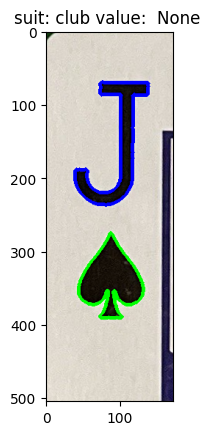

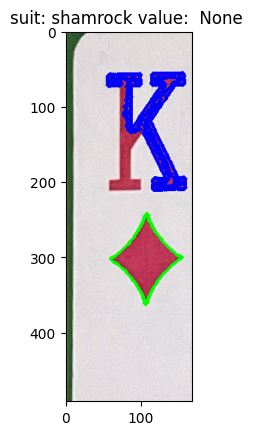

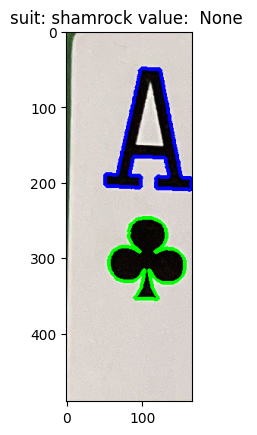

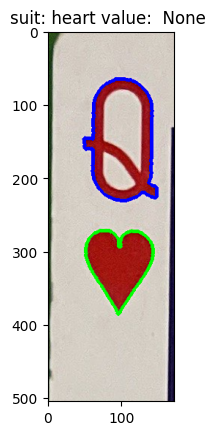

TypeError: int() argument must be a string, a bytes-like object or a real number, not 'NoneType'

In [108]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


def sort_contours(cnts):
    # Sort contours based on contour area and then return the sorted contours
    return sorted(cnts, key=cv2.contourArea, reverse=True)

# Function to order points for perspective transform
def order_points(pts):
    rect = np.zeros((4, 2), dtype="float32")
    s = pts.sum(axis=1)
    rect[0] = pts[np.argmin(s)]
    rect[2] = pts[np.argmax(s)]
    diff = np.diff(pts, axis=1)
    rect[1] = pts[np.argmin(diff)]
    rect[3] = pts[np.argmax(diff)]
    return rect

# Function to perform perspective transform
def four_point_transform(image, pts):
    rect = order_points(pts)
    (tl, tr, br, bl) = rect
    widthA = np.sqrt(((br[0] - bl[0]) ** 2) + ((br[1] - bl[1]) ** 2))
    widthB = np.sqrt(((tr[0] - tl[0]) ** 2) + ((tr[1] - tl[1]) ** 2))
    maxWidth = max(int(widthA), int(widthB))
    heightA = np.sqrt(((tr[0] - br[0]) ** 2) + ((tr[1] - br[1]) ** 2))
    heightB = np.sqrt(((tl[0] - bl[0]) ** 2) + ((tl[1] - bl[1]) ** 2))
    maxHeight = max(int(heightA), int(heightB))
    dst = np.array([
        [0, 0],
        [maxWidth - 1, 0],
        [maxWidth - 1, maxHeight - 1],
        [0, maxHeight - 1]], dtype="float32")
    M = cv2.getPerspectiveTransform(rect, dst)
    warped = cv2.warpPerspective(image, M, (maxWidth, maxHeight))
    return warped

def crop_number_regions(img):
    # Convert to grayscale and threshold
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (3, 3), 0)
    thresh = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)

    # Find contours
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Filter out small contours
    contours = [cnt for cnt in contours if cv2.contourArea(cnt) > 1000]

    # Straighten each card and crop the number region
    number_regions = []
    for cnt in contours:
        peri = cv2.arcLength(cnt, True)
        approx = cv2.approxPolyDP(cnt, 0.02 * peri, True)
        if len(approx) == 4:
            # Straighten the card
            warped_card = four_point_transform(img, approx.reshape(4, 2))

            # Crop the number region from the straightened card (top left corner)
            h, w = warped_card.shape[:2]
            number_region = warped_card[0:int(h * 0.35), 0:int(w * 0.17)]
            number_regions.append(number_region)

    return number_regions

def determine_contour_positions(second_largest_contour, third_largest_contour):
    #get bounding rectangles for both contours
    _, y2, _, _ = cv2.boundingRect(second_largest_contour)
    _, y3, _, _ = cv2.boundingRect(third_largest_contour)
    #determine which contour is below the other
    if y2 > y3:
        return second_largest_contour, third_largest_contour
    else:
        return third_largest_contour, second_largest_contour
    
    
def identify_suit(lower_contour_region, template):
    # Ensure the lower contour region is not empty
    if lower_contour_region.size == 0:
        return "Unknown"

    # Convert to grayscale for template matching
    lower_contour_region_gray = cv2.cvtColor(lower_contour_region, cv2.COLOR_BGR2GRAY)

    suit_name = None
    max_corr = 0
    
    for name, template in templates.items():
        if template is None or template.size == 0:
            continue

        template_resized = cv2.resize(template, (lower_contour_region_gray.shape[1], lower_contour_region_gray.shape[0]))
        result = cv2.matchTemplate(lower_contour_region_gray, template_resized, cv2.TM_CCOEFF_NORMED)
        _, max_val, _, _ = cv2.minMaxLoc(result)

        if max_val > max_corr:
            max_corr = max_val
            suit_name = name

    return suit_name
    
def identify_value(higher_contour_region, images_to_compare, characters):
      # Ensure there are templates to compare with
    if not images_to_compare or not characters:
        return None

    for image_index, image_to_compare in enumerate(images_to_compare):
        # Apply binary threshold
        _, binary_image1 = cv2.threshold(image_to_compare, 128, 255, cv2.THRESH_BINARY)
        _, binary_image2 = cv2.threshold(higher_contour_region, 128, 255, cv2.THRESH_BINARY)

        # Compare the binary images
        if binary_image1.shape == binary_image2.shape and binary_image1.dtype == binary_image2.dtype:
            matching_pixels = np.sum(binary_image1 == binary_image2)
        else:
            resized_image1 = cv2.resize(binary_image1, binary_image2.shape[1::-1])
            matching_pixels = np.sum(resized_image1 == binary_image2)
            
        total_pixels = binary_image1.size

        # Calculate the matching percentage
        matching_percentage = (matching_pixels / total_pixels) * 100

        # Set a threshold for matching percentage
        threshold_percentage = 50 # Adjust this threshold as needed

        # Check if the matching percentage is above the threshold
        if matching_percentage >= threshold_percentage:
            return characters[image_index]  # Return the matched character

    return None

def select_most_probable_value(values):
    if not values:
        return None
    return values[0]


def detect_contours(number_regions, templates):
    contour_pairs = []  

    for number_region in number_regions:
        #convert to grayscale and apply thresholding
        gray_region = cv2.cvtColor(number_region, cv2.COLOR_BGR2GRAY)
        thresh_region = cv2.adaptiveThreshold(gray_region, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
        
        #find contours 
        contours_region, _ = cv2.findContours(thresh_region, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        sorted_contours_region = sort_contours(contours_region)

        if len(sorted_contours_region) > 2:
            # Get the second and third largest contours based on the area
            second_largest_contour = sorted_contours_region[1]
            third_largest_contour = sorted_contours_region[2]
            
            lower_contour, higher_contour = determine_contour_positions(second_largest_contour, third_largest_contour)

            #crop and append the lower contour
            x, y, w, h = cv2.boundingRect(lower_contour)
            lower_contour_region = number_region[y:y+h, x:x+w]
            suit = identify_suit(lower_contour_region, templates)
            
            
            #crop and append the higher contour
            x, y, w, h = cv2.boundingRect(higher_contour)
            higher_contour_region = number_region[y:y+h, x:x+w]
            value = identify_value(higher_contour_region, images_to_compare, characters)
            most_probable_value = select_most_probable_value(value) 
            
            contour_pairs.append((suit, most_probable_value))

            #display contours
            debug_image = number_region.copy()
            cv2.drawContours(debug_image, [lower_contour], -1, (0, 255, 0), 3)  
            cv2.drawContours(debug_image, [higher_contour], -1, (255, 0, 0), 3) 
            plt.imshow(cv2.cvtColor(debug_image, cv2.COLOR_BGR2RGB))
            plt.title(f"suit: {suit} value:  {value} ")

            plt.show()
            
    return contour_pairs

def game_logic(contour_pairs):
    
    total_sum = 0
    
    for suit, number in contour_pairs:
        if number in ['J', 'Q', 'K']:
            total_sum += 10
        elif number == 'A':
            total_sum += 1  
        else:
            total_sum += int(number)
    # Sum the cards in play
    total_sum = sum(int(number) for number, suit in contour_pairs)
    print(f"The total sum of the detected numbers is: {total_sum}")

    if total_sum < 21:
       result =  print("The sum is smaller than 21.")
    elif total_sum > 21:
       result = print("The sum is larger than 21.")
    else:
       result = print("You won the game!")
    return result

# Load the image from file
img = cv2.imread("cards_green.jpg")

templates = {
    'heart': cv2.imread('heart.jpg', 0),
    'diamond': cv2.imread('diamond.jpg', 0),
    'club': cv2.imread('club.jpg', 0),
    'shamrock': cv2.imread('shamrock.jpg', 0)
}


J = cv2.imread('J.png', cv2.IMREAD_GRAYSCALE)
K = cv2.imread('K.png', cv2.IMREAD_GRAYSCALE)
Q = cv2.imread('Q.png', cv2.IMREAD_GRAYSCALE)
A = cv2.imread('A.png', cv2.IMREAD_GRAYSCALE)
num3 = cv2.imread('num3.png')
num4 = cv2.imread('num4.png', cv2.IMREAD_GRAYSCALE)
num5 = cv2.imread('num5.png', cv2.IMREAD_GRAYSCALE)
num9 = cv2.imread('num9.png', cv2.IMREAD_GRAYSCALE)

# Convert images to float32
J = J.astype(np.float32)
K = K.astype(np.float32)
Q = Q.astype(np.float32)
A = A.astype(np.float32)
num3 = num3.astype(np.float32)
num4 = num4.astype(np.float32)
num5 = num5.astype(np.float32)
num9 = num9.astype(np.float32)

images_to_compare = [J, K, Q, A, num3, num4, num5, num9]
characters = ['J', 'K', 'Q', 'A', '3', '4', '5', '9']


# Use the function to get the number regions
number_regions = crop_number_regions(img)

contour_pairs = detect_contours(number_regions, templates)

result = game_logic(contour_pairs)

In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


def sort_contours(cnts):
    # Sort contours based on contour area and then return the sorted contours
    return sorted(cnts, key=cv2.contourArea, reverse=True)

# Function to order points for perspective transform
def order_points(pts):
    rect = np.zeros((4, 2), dtype="float32")
    s = pts.sum(axis=1)
    rect[0] = pts[np.argmin(s)]
    rect[2] = pts[np.argmax(s)]
    diff = np.diff(pts, axis=1)
    rect[1] = pts[np.argmin(diff)]
    rect[3] = pts[np.argmax(diff)]
    return rect

# Function to perform perspective transform
def four_point_transform(image, pts):
    rect = order_points(pts)
    (tl, tr, br, bl) = rect
    widthA = np.sqrt(((br[0] - bl[0]) ** 2) + ((br[1] - bl[1]) ** 2))
    widthB = np.sqrt(((tr[0] - tl[0]) ** 2) + ((tr[1] - tl[1]) ** 2))
    maxWidth = max(int(widthA), int(widthB))
    heightA = np.sqrt(((tr[0] - br[0]) ** 2) + ((tr[1] - br[1]) ** 2))
    heightB = np.sqrt(((tl[0] - bl[0]) ** 2) + ((tl[1] - bl[1]) ** 2))
    maxHeight = max(int(heightA), int(heightB))
    dst = np.array([
        [0, 0],
        [maxWidth - 1, 0],
        [maxWidth - 1, maxHeight - 1],
        [0, maxHeight - 1]], dtype="float32")
    M = cv2.getPerspectiveTransform(rect, dst)
    warped = cv2.warpPerspective(image, M, (maxWidth, maxHeight))
    return warped

def crop_number_regions(img):
    # Convert to grayscale and threshold
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (3, 3), 0)
    thresh = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)

    # Find contours
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Filter out small contours
    contours = [cnt for cnt in contours if cv2.contourArea(cnt) > 1000]

    # Straighten each card and crop the number region
    number_regions = []
    for cnt in contours:
        peri = cv2.arcLength(cnt, True)
        approx = cv2.approxPolyDP(cnt, 0.02 * peri, True)
        if len(approx) == 4:
            # Straighten the card
            warped_card = four_point_transform(img, approx.reshape(4, 2))

            # Crop the number region from the straightened card (top left corner)
            h, w = warped_card.shape[:2]
            number_region = warped_card[0:int(h * 0.35), 0:int(w * 0.17)]
            number_regions.append(number_region)

    return number_regions

def determine_contour_positions(second_largest_contour, third_largest_contour):
    #get bounding rectangles for both contours
    _, y2, _, _ = cv2.boundingRect(second_largest_contour)
    _, y3, _, _ = cv2.boundingRect(third_largest_contour)
    #determine which contour is below the other
    if y2 > y3:
        return second_largest_contour, third_largest_contour
    else:
        return third_largest_contour, second_largest_contour
    
    
def identify_suit(lower_contour_region, template):
    # Ensure the lower contour region is not empty
    if lower_contour_region.size == 0:
        return "Unknown"

    # Convert to grayscale for template matching
    lower_contour_region_gray = cv2.cvtColor(lower_contour_region, cv2.COLOR_BGR2GRAY)

    suit_name = None
    max_corr = 0
    
    for name, template in templates.items():
        if template is None or template.size == 0:
            continue

        template_resized = cv2.resize(template, (lower_contour_region_gray.shape[1], lower_contour_region_gray.shape[0]))
        result = cv2.matchTemplate(lower_contour_region_gray, template_resized, cv2.TM_CCOEFF_NORMED)
        _, max_val, _, _ = cv2.minMaxLoc(result)

        if max_val > max_corr:
            max_corr = max_val
            suit_name = name

    return suit_name
    
def identify_value(number_region, number_templates):
    # Convert to grayscale and apply thresholding
    gray_region = cv2.cvtColor(number_region, cv2.COLOR_BGR2GRAY)
    thresh_region = cv2.adaptiveThreshold(gray_region, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

    # Find contours
    contours_region, _ = cv2.findContours(thresh_region, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    sorted_contours_region = sort_contours(contours_region)

    if len(sorted_contours_region) > 0:
        # Get the largest contour based on area
        largest_contour = sorted_contours_region[0]

        # Crop and identify the number
        x, y, w, h = cv2.boundingRect(largest_contour)
        number_roi = number_region[y:y+h, x:x+w]
        number = match_number_template(number_roi, number_templates)

        return number
    return "Unknown"
def match_number_template(number_roi, number_templates):
    number_name = None
    max_corr = 0

    for name, template in number_templates.items():
        if template is None or template.size == 0:
            continue

        template_resized = cv2.resize(template, (number_roi.shape[1], number_roi.shape[0]))

        # Check if number_roi is already a single-channel image
        if len(number_roi.shape) == 2:
            number_gray = number_roi
        else:
            number_gray = cv2.cvtColor(number_roi, cv2.COLOR_BGR2GRAY)

        # Check if template_resized is already a single-channel image
        if len(template_resized.shape) == 2:
            template_gray = template_resized
        else:
            template_gray = cv2.cvtColor(template_resized, cv2.COLOR_BGR2GRAY)

        result = cv2.matchTemplate(number_gray, template_gray, cv2.TM_CCOEFF_NORMED)
        _, max_val, _, _ = cv2.minMaxLoc(result)

        if max_val > max_corr:
            max_corr = max_val
            number_name = name

    return number_name





def select_most_probable_value(values):
    if not values:
        return None
    return values[0]


def detect_contours(number_regions, templates):
    contour_pairs = []  

    for number_region in number_regions:
        #convert to grayscale and apply thresholding
        gray_region = cv2.cvtColor(number_region, cv2.COLOR_BGR2GRAY)
        thresh_region = cv2.adaptiveThreshold(gray_region, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
        
        #find contours 
        contours_region, _ = cv2.findContours(thresh_region, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        sorted_contours_region = sort_contours(contours_region)

        if len(sorted_contours_region) > 2:
            # Get the second and third largest contours based on the area
            second_largest_contour = sorted_contours_region[1]
            third_largest_contour = sorted_contours_region[2]
            
            lower_contour, higher_contour = determine_contour_positions(second_largest_contour, third_largest_contour)

            #crop and append the lower contour
            x, y, w, h = cv2.boundingRect(lower_contour)
            lower_contour_region = number_region[y:y+h, x:x+w]
            suit = identify_suit(lower_contour_region, templates)
            
            
            #crop and append the higher contour
            x, y, w, h = cv2.boundingRect(higher_contour)
            higher_contour_region = number_region[y:y+h, x:x+w]
            value = identify_value(number_region, number_templates)
            most_probable_value = select_most_probable_value(value) 
            
            contour_pairs.append((suit, most_probable_value))

            #display contours
            debug_image = number_region.copy()
            cv2.drawContours(debug_image, [lower_contour], -1, (0, 255, 0), 3)  
            cv2.drawContours(debug_image, [higher_contour], -1, (255, 0, 0), 3) 
            plt.imshow(cv2.cvtColor(debug_image, cv2.COLOR_BGR2RGB))
            plt.title(f"suit: {suit} value:  {value} ")

            plt.show()
            
    return contour_pairs

def game_logic(contour_pairs):
    
    total_sum = 0
    
    for suit, number in contour_pairs:
        if number in ['J', 'Q', 'K']:
            total_sum += 10
        elif number == 'A':
            total_sum += 1  
        else:
            total_sum += int(number)
    # Sum the cards in play
    total_sum = sum(int(number) if number.isdigit() else 0 for number, suit in contour_pairs if number and number.isdigit())
    print(f"The total sum of the detected numbers is: {total_sum}")

    if total_sum < 21:
       result =  print("The sum is smaller than 21.")
    elif total_sum > 21:
       result = print("The sum is larger than 21.")
    else:
       result = print("You won the game!")
    return result

# Load the image from file
img = cv2.imread("card_green.jpg")

templates = {
    'heart': cv2.imread('heart.jpg', 0),
    'diamond': cv2.imread('diamond.jpg', 0),
    'club': cv2.imread('club.jpg', 0),
    'shamrock': cv2.imread('shamrock.jpg', 0)
}
number_templates = {

    'J' : cv2.imread('J.png', cv2.IMREAD_GRAYSCALE),
    'K' : cv2.imread('K.png', cv2.IMREAD_GRAYSCALE),
    'Q' : cv2.imread('Q.png', cv2.IMREAD_GRAYSCALE),
    'A' : cv2.imread('A.png', cv2.IMREAD_GRAYSCALE),
    '3' : cv2.imread('num3.png', cv2.IMREAD_GRAYSCALE),
    '4' : cv2.imread('num4.png', cv2.IMREAD_GRAYSCALE),
    '5' : cv2.imread('num5.png', cv2.IMREAD_GRAYSCALE),
    '9' : cv2.imread('num9.png', cv2.IMREAD_GRAYSCALE)
}


images_to_compare = [J, K, Q, A, num3, num4, num5, num9]
characters = ['J', 'K', 'Q', 'A', '3', '4', '5', '9']


# Use the function to get the number regions
number_regions = crop_number_regions(img)

contour_pairs = detect_contours(number_regions, templates)

result = game_logic(contour_pairs)

NameError: name 'J' is not defined